In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

Data Set Information: Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
Attribute Information: Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

1.	instant: record index
2.	dteday : date
3.	season : season (1:winter, 2:spring, 3:summer, 4:fall)
4.	yr : year (0: 2011, 1:2012)
5.	mnth : month ( 1 to 12)
6.	hr : hour (0 to 23)
7.	holiday : weather day is holiday or not (extracted from [Web Link])
8.	weekday : day of the week
9.	workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10.	weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11.	temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
12.	atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
13.	hum: Normalized humidity. The values are divided to 100 (max)
14.	windspeed: Normalized wind speed. The values are divided to 67 (max)
15.	casual: count of casual users
16.	registered: count of registered users
17.	cnt: count of total rental bikes including both casual and registered (Target)

# Data Ingestion

In [3]:
day=pd.read_csv("C:\\Users\\Asus\\Desktop\\SLR-SET-4\\day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day.shape

(731, 16)

In [5]:
hour=pd.read_csv("C:\\Users\\Asus\\Desktop\\SLR-SET-4\\hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Describtive analyis

In [6]:
hour.shape

(17379, 17)

In [7]:

hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [10]:
day.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [11]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
#Converting the datatype of the column.
hour.dteday = pd.to_datetime(hour.dteday)
hour["day"]=hour.dteday.dt.day

# now there is one thing noticed in this hour dataframe that is upon doing groupby on dteday column and taking sum we are getting the given dataset for day

In [15]:
xgrp=hour.groupby("dteday").sum().reset_index()
xgrp.head()

,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,300,24,0,24,276,0,144,0,38,8.26,8.7270,19.34,3.8507,331,654,985,24
1,2011-01-02,828,23,0,23,271,0,0,0,45,8.36,8.1360,16.01,5.7164,131,670,801,46
2,2011-01-03,1287,22,0,22,271,0,22,22,22,4.32,4.1669,9.62,5.4628,120,1229,1349,66
3,2011-01-04,1863,23,0,23,273,0,46,23,24,4.60,4.8788,13.58,3.6868,108,1454,1562,92
4,2011-01-05,2392,23,0,23,273,0,69,23,23,5.22,5.2732,10.05,4.2987,82,1518,1600,115


# lets try to refine our findings by doing suitable mathematical operations on categorical columns

In [16]:
xgrp=hour.groupby("dteday",as_index=False).agg({"season":"mean","instant":"first","yr":"mean","mnth":"mean","holiday":"mean","weekday":"mean","workingday":"mean","weathersit":"median","temp":"mean","atemp":"mean","hum":"mean","windspeed":"mean","casual":"sum","registered":"sum","cnt":"sum"})

In [17]:
xgrp.shape

(731, 16)

In [18]:
xgrp.head()

,dteday,season,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,1,0,1,0,6,0,1.5,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,25,0,1,0,0,0,2.0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,48,0,1,0,1,1,1.0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,70,0,1,0,2,1,1.0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,93,0,1,0,3,1,1.0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
xgrp.dteday.isin(day.dteday).sum()

731

In [20]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# As we can see that both the given datasets are indeed same , so we will work on hour dataset as it has one extra feature which is hr , also it has significantly greater no. of rows than day dataset which will infact help in our modeling 

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Now lets first create a base model without any EDA, also we wont be dealing with any sort of outliers for our base model and would be including every feature except the ones that are row specifics such as instant,etc

# Base Model using Linear Regression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
dataset=hour.drop(["instant","dteday"],axis=1)

In [23]:
x=hour.drop(["instant","dteday","cnt"],axis=1)
y=hour.cnt

## Lets also try to scale our dataset using Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=12)

In [26]:
xtrain.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
8273,4,0,12,9,0,5,1,1,0.36,0.3333,0.46,0.3881,8,235,16
8393,1,0,12,9,0,3,1,2,0.40,0.4091,0.87,0.2239,14,220,21
1351,1,0,3,14,0,2,1,1,0.32,0.3333,0.36,0.1343,18,61,1
12541,2,1,6,18,0,1,1,2,0.80,0.7273,0.43,0.2985,105,726,11
12862,3,1,6,3,0,1,1,1,0.68,0.6364,0.69,0.2537,1,4,25


In [27]:
scaled_xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [28]:
scaled_xtrain.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
0,1.353542,-1.007871,1.585808,-0.369282,-0.174754,0.997222,0.684865,-0.669147,-0.702268,-0.819948,-0.863487,1.620092,-0.559108,0.543698,0.031383
1,-1.350754,-1.007871,1.585808,-0.369282,-0.174754,0.000967,0.684865,0.892832,-0.494959,-0.379972,1.257557,0.276422,-0.437504,0.443923,0.599805
2,-1.350754,-1.007871,-1.021614,0.354038,-0.174754,-0.497160,0.684865,-0.669147,-0.909577,-0.819948,-1.380815,-0.456786,-0.356435,-0.613686,-1.673883
3,-0.449322,0.992190,-0.152473,0.932695,-0.174754,-0.995287,0.684865,0.892832,1.578131,1.467000,-1.018685,0.886883,1.406820,3.809647,-0.537039
4,0.452110,0.992190,-0.152473,-1.237266,-0.174754,-0.995287,0.684865,-0.669147,0.956204,0.939377,0.326367,0.520279,-0.700979,-0.992828,1.054543


In [29]:
scaled_xtest.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
0,1.353542,0.992190,1.296095,-0.079954,-0.174754,0.499095,0.684865,0.892832,-0.805923,-0.819948,-0.087495,-0.456786,-0.153762,-0.101510,-0.082301
1,-1.350754,0.992190,-1.021614,0.354038,-0.174754,-1.493414,-1.460141,-0.669147,-0.702268,-0.819948,-1.484280,1.375416,1.427087,0.483833,-1.332830
2,1.353542,-1.007871,1.296095,0.354038,-0.174754,0.000967,0.684865,0.892832,-0.598614,-0.468200,-1.018685,1.375416,-0.457772,-0.360924,1.622965
3,-0.449322,-1.007871,-0.731900,0.643366,-0.174754,-1.493414,-1.460141,0.892832,0.126968,0.147651,0.481566,-0.212111,2.014839,-0.001736,-0.650723
4,0.452110,0.992190,0.137240,1.511351,-0.174754,-0.995287,0.684865,-0.669147,1.267168,1.202898,-0.035762,0.031746,0.089446,0.104690,0.827174


In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
y_lr=lr.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error

In [33]:
r2_score(ytest,y_lr)

1.0

In [34]:
np.sqrt(mean_squared_error(ytest,y_lr))

2.4344797113747415e-13

# The main inference that can be drawned from our base model is that our model is overfitting on test data , and hence would not perform adequately on testing data also the lower RMSE doesnt make our model accurate until we soemhow reduce the overfitting 

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# As we know there are some assumption for Linear Regression that sould be tested before any analysis , so lets try to check each one of them

### 1. Residual

In [35]:
resid = ytest - y_lr

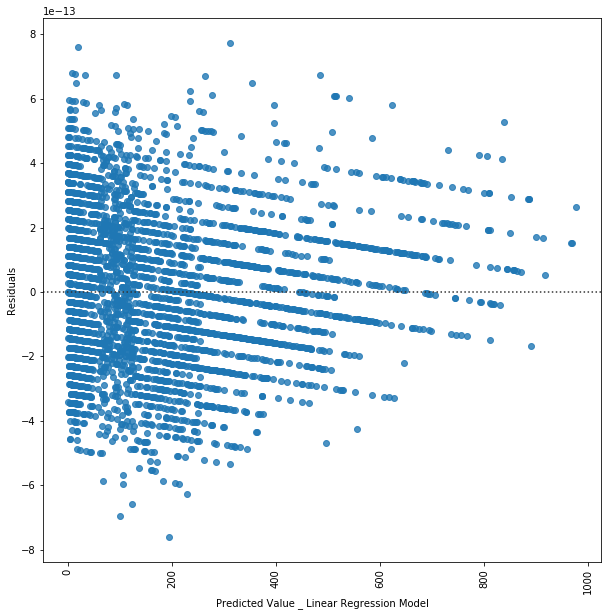

In [36]:
plt.figure(figsize = (10,10))
sns.residplot(y_lr,resid)
plt.xlabel('Predicted Value _ Linear Regression Model')
plt.ylabel('Residuals')
plt.xticks(rotation = 90)
plt.show()

## A trend is clearly being observed in the residual plot.

### 2. Normality

### 2.1 Using QQ Plot

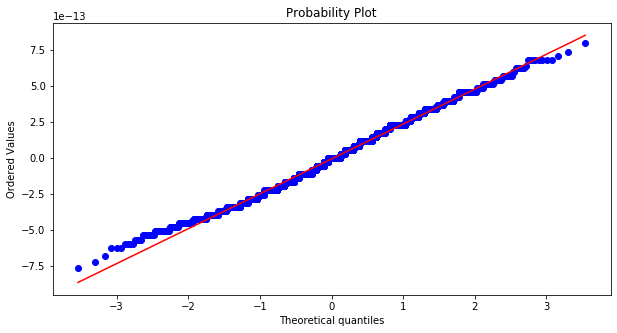

In [37]:
from scipy import stats
import pylab
plt.figure(figsize = (10,5))
stats.probplot(resid,plot=pylab)
plt.show()

### 2.2 Using Shapiro Wilk Test For Normality

In [38]:
from scipy.stats import shapiro
teststats,pvalue=shapiro(resid)

In [39]:
pvalue     # We Reject our null hypothesis

4.08412713370776e-11

## From the QQplot and Shapiro Wilk Test we could see that the residuals are not normal in nature.


### 3. Multicollinearity check

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Adding a constant column to the original dataset
dataset['Constant'] = 1
vif  = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
pd.DataFrame({'vif':vif}, index= dataset.columns)

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
season,3.529502
yr,1.094875
mnth,3.286444
hr,1.263008
holiday,1.084598
weekday,1.017868
workingday,1.404429
weathersit,1.284525
temp,43.893583
atemp,44.123868


## In VIF test, we saw that there are couple of variables for whom the VIF value was more than 10 indicating those variable are vunerable in predicting the linear regression model and hence, Regression is not the best model to choose here.

In [41]:
dataset = dataset.drop('Constant',axis=1)

### 4. Heteroscedasticity

Following are the hypothesis for the test:

H0: The Residuals are not Heteroscedastic in Nature

H1 :The Residuals are Heteroscedastic in nature

In [42]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(resid, xtest)

(0.9816650751158462, 0.6495129306596865, 'increasing')

## In Heteroscedasticity, we realized that GolffendQaunt Test gives a P value < 0.05 which strongly indicates that error/data is heteroscedastic and therefore we cannot deploy LR Model.


### 5. Durbin Watson Test : Auto Correlation between the errors

In [43]:
sms.durbin_watson(resid)

1.9569678498923166

## Durbin Watson Test of Correlation of Errors aka Auto correlation- Test Statistic is found to be 1.94 which indicates there is no correlation in error.


### 6. Linearity 

Following are the hypothesis for the test:

H0: The Data is linear in nature

H1 :The Data is not linear in nature.

In [44]:
import statsmodels.api as stat
model = stat.OLS(endog = y, exog= x).fit()

In [45]:
stat.stats.linear_rainbow(model)

(-0.635954794387652, 1.0)

## From the Linear Rainbow test we could see that the pvalue < 0.5 so we can reject the null hpothesis thus we can conclude that the data is not linear in nature.


## Summary of Assumptions

1. A trend is being observed in the residual plot.
2. From the QQplot and Shapiro Wilk Test we could see that the residuals are not normal in nature.
3. In VIF test, we saw that there are couple of variables for whom the VIF value was more than 10 indicating those variable are vunerable in predicting the linear regression model and hence, Regression is not the best bet here.
4. In Heteroscedasticity, we realized that GolffendQaunt Test gives a P value < 0.05 which strongly indicates that error/data is heteroscedastic and therefore we cannot deploy LR Model.
5. Durbin Watson Test of Correlation of Errors aka Auto correlation- Test Statistic is found to be 1.94 which indicates there is no correlation in error.
6. From the Linear Rainbow test we could see that the pvalue < 0.5 so we can reject the null hpothesis thus we can conclude that the data is not linear in nature.

Since Maximum assumptions of the Linear Regression is failing so applying linear regression will not yield good result.
But still we will apply the Linear Regression.

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Now lest us try to reduce the problem of overfitting by doing appropiate EDA on our data, also for ease of coding process and time managment we would be defining some custom function to appy whenever needed

# ************ EDA ********

In [46]:
dataset.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


# To ease our Univariate and Bivariate analysis and also the Outlier detection process and getting inferences from visuals we will be using a cutom function that can be applied to all the columns and will give the results according to each column type

In [47]:
def eda(col):
    print("_____________________________________________________________________________________________________________________________________________________________________________________________________________________")
    print()
    print()
    print("************************************Univariate Analysis**************************************************")
    print()
    print()
    print(col.describe())
    print()
    print()
    print()
    print()
    fig = plt.figure(figsize=(30,5))
    plt.subplot(131)
    sns.boxplot(col)
    plt.subplot(132)    
    sns.distplot(col)    
    plt.subplot(133)
    sns.violinplot(x = col)
    plt.show()
    print()
    print()
    IQR=col.quantile(0.75)-col.quantile(0.25)
    out_left_limit=col.quantile(0.25)-1.5*IQR
    out_right_limit=col.quantile(0.75)+1.5*IQR
    print("Total no. of entries : ",len(col))
    print()
    print("The value for left whisker = ",out_left_limit)
    print()
    print("Datapoints before left whisker : ")
    print((col<out_left_limit).value_counts())
    print()
    print("The value for right whisker = ",out_right_limit)
    print()
    print("Datapoints before right whisker : ")
    print((col>out_right_limit).value_counts())
    print()
    print()
    print()
    print()
    print("************************************Bivariate Analysis**************************************************")
    print()
    print()
    fig = plt.figure(figsize=(30,10))
    plt.subplot(131)
    sns.scatterplot(x=col,y=y)
    if col.nunique()<=24:
        plt.subplot(132)
        sns.countplot(col)
        plt.subplot(133)
        sns.boxplot(col,y)
        print(pd.DataFrame(col.value_counts().head()))
        print()
        print()        
    plt.show()
    temp=col.corr(y)
    print()
    print()
    print("The Corelation between Target Column and Input Column is : ",temp)
    print()
    print()

 
    
    

In [ ]:
dataset.apply(eda)

# Inferences so far :

1. There is presence of several outliers that existing in columns such as [ hum,windspeed, casual, registered and cnt ] , it should be noted that cnt is our Target variable 

2. While workingday column is slightly imbalanced, the holiday column is too much imbalanced

3. The registered column is very highly corelated with the target column with correlation equals to 0.97 also its scatter plot forms a linear distribution

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Lets try out some transformations on relevant columns so as to reduce skewness and treating outliers along the way

## Transfornation on Target Column

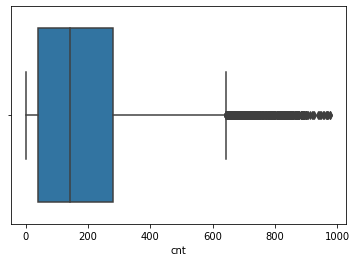

In [48]:
sns.boxplot(dataset.cnt)

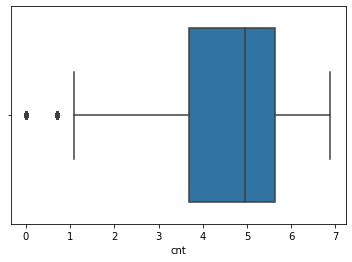

In [49]:
sns.boxplot(np.log(dataset.cnt))

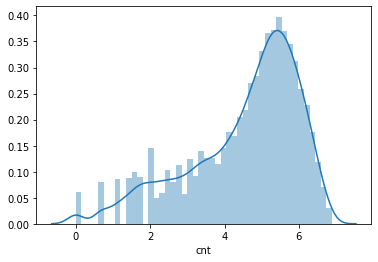

In [50]:
sns.distplot(np.log(dataset.cnt))

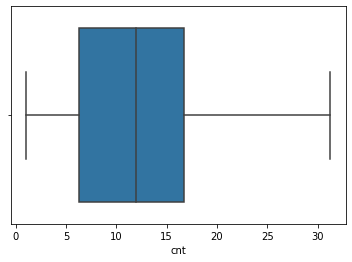

In [51]:
sns.boxplot(np.sqrt(dataset.cnt))

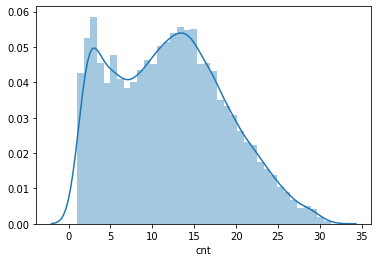

In [52]:
sns.distplot(np.sqrt(dataset.cnt))

## Squareroot transformation corrects the skewness and make distribution normal than before

## Transfornation on Casual Column

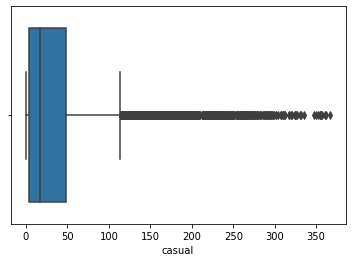

In [53]:
sns.boxplot(dataset.casual)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


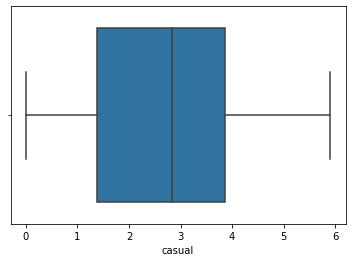

In [54]:
sns.boxplot(np.log(dataset.casual))

### the outliers seems to be corrected with log transformation , however we wont be using this transformation as there are numerous entries that are 0 , and log of 0 will be infinity

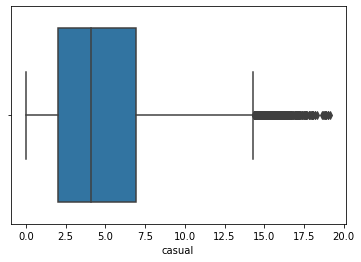

In [55]:
sns.boxplot(np.sqrt(dataset.casual))

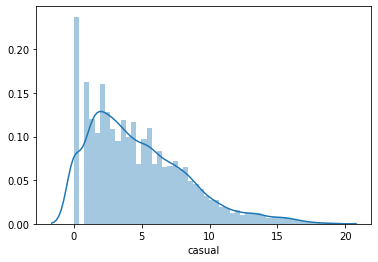

In [56]:
sns.distplot(np.sqrt(dataset.casual))

## Squareroot transformation seems to be the right choice for this column

## Applying the transformation on our dataset

In [57]:
# making a copy 

df= dataset.copy()

In [58]:
df.casual=np.sqrt(df.casual)

In [59]:
df.cnt=np.log(df.cnt)

In [60]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.732051,13,2.772589,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.828427,32,3.688879,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,2.236068,27,3.465736,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.732051,10,2.564949,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,1,0.000000,1


## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Check for Multi Collinearity

## For this we would be defining a function that will make tables coantaining name of columns according to their co relation with each other

In [61]:
corr_9_up=[]
corr_7_to_9=[]
corr_5_to_7=[]
corr_3_to_5=[]
corr_3_less=[]
for i in df.columns:
    for j in df.columns:
        p=abs(df[i].corr(df[j]))
        if p>=0.9:
            corr_9_up.append([i,j,p])
        elif p>=0.7:
            corr_7_to_9.append([i,j,p])        
        elif p>=0.5:
            corr_5_to_7.append([i,j,p])
        elif p>=0.3:
            corr_3_to_5.append([i,j,p])
        else:
            corr_3_less.append([i,j,p])
            

In [62]:
names=["Column 1","Column 2","corelation"]
corr_3_less=pd.DataFrame(corr_3_less,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_3_less.drop("index",axis=1,inplace=True)
corr_3_to_5=pd.DataFrame(corr_3_to_5,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_3_to_5.drop("index",axis=1,inplace=True)
corr_7_to_9=pd.DataFrame(corr_7_to_9,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_7_to_9.drop("index",axis=1,inplace=True)
corr_9_up=pd.DataFrame(corr_9_up,columns=names).sort_values(by="corelation",ascending=False).reset_index()
corr_9_up.drop("index",axis=1,inplace=True)

In [63]:
corr_9_up

,Column 1,Column 2,corelation
0,season,season,1.000000
1,casual,casual,1.000000
2,mnth,mnth,1.000000
3,weekday,weekday,1.000000
4,weathersit,weathersit,1.000000
5,temp,temp,1.000000
6,cnt,cnt,1.000000
7,registered,registered,1.000000
8,atemp,atemp,1.000000
9,hum,hum,1.000000


In [64]:
corr_7_to_9

,Column 1,Column 2,corelation
0,season,mnth,0.830386
1,mnth,season,0.830386
2,registered,cnt,0.778950
3,cnt,registered,0.778950
4,casual,cnt,0.752237
5,cnt,casual,0.752237


 ## Correlation Heatmap

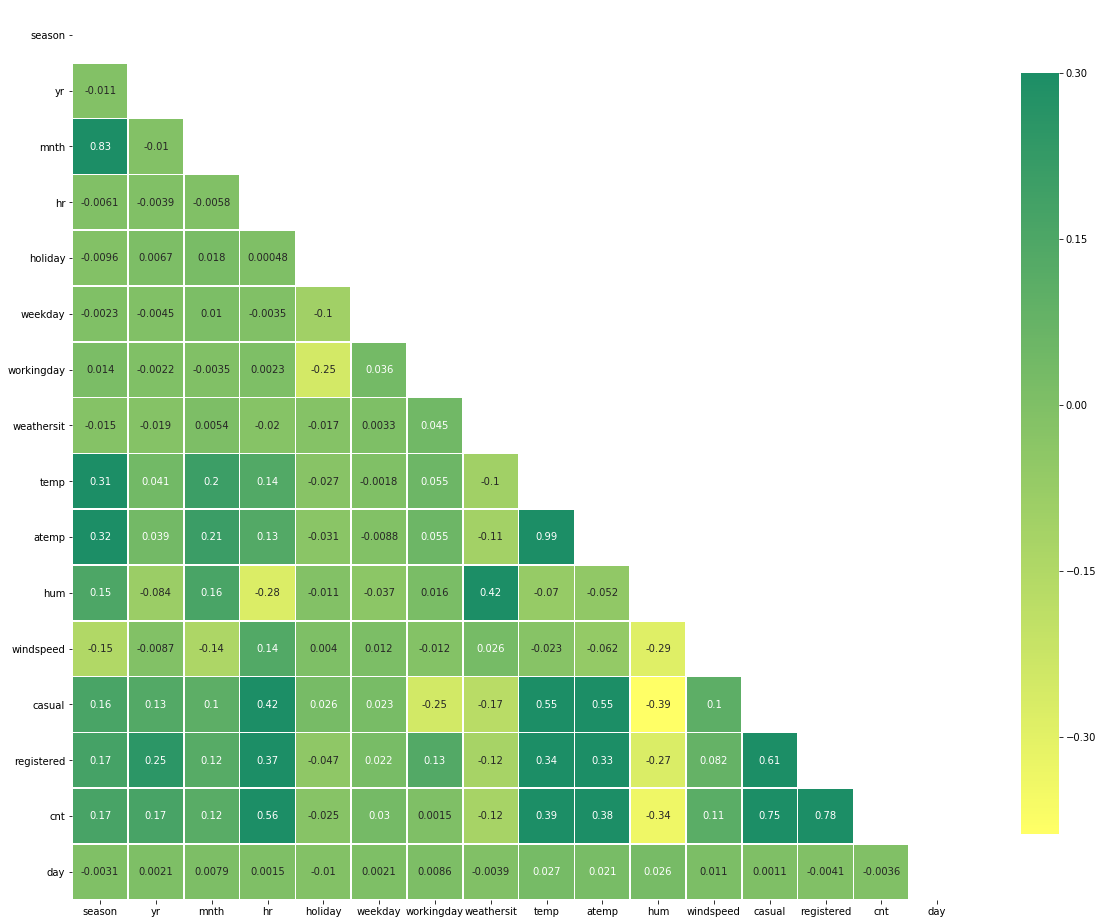

In [65]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(data = df.corr(), annot = True,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, mask = mask)
plt.show()

## Inference:- Seeing the correlation plot, the highly correlated variables are:-

###  1. yr and instant

### 2. season and month

### 3. temp and atemp

### 4. cnt and registered

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Feature Selection :  As we are finished with transformations we can now proceed with Feature Selection 

## OLS Stats Model for Feature Selection

In [66]:
import statsmodels.regression.linear_model as smf

In [67]:
# again making a copy of dataset
dff=df.copy

# Backward Elimination

In [68]:
df["constant"]=1

In [69]:
x_columns = list(df.columns)

In [70]:
# Automating the selection of optimal features using backward elimination, here probability threshold is 0.05.
while(True):
    model = stat.OLS(endog=df.cnt, exog = df[x_columns].drop("cnt",axis=1)).fit()
    pvals = model.pvalues
    max_pval = pvals[(pvals == pvals.max()) & (pvals > 0.05)]
    if(max_pval.empty == False):
        x_columns.remove(max_pval.index[0])
        continue
    else:
        break
        
x_columns

['season',
 'hr',
 'weekday',
 'workingday',
 'temp',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'constant']

### Remaining features after OLS model stats

In [71]:
x_columns

['season',
 'hr',
 'weekday',
 'workingday',
 'temp',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'constant']

# Building Model after OLS Model

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [73]:
x=df[x_columns].drop(["cnt","constant"],axis=1)
y=df.cnt

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=12)

In [75]:
xtrain.head()

,season,hr,weekday,workingday,temp,windspeed,casual,registered
8273,4,9,5,1,0.36,0.3881,2.828427,235
8393,1,9,3,1,0.40,0.2239,3.741657,220
1351,1,14,2,1,0.32,0.1343,4.242641,61
12541,2,18,1,1,0.80,0.2985,10.246951,726
12862,3,3,1,1,0.68,0.2537,1.000000,4


In [76]:
scaled_xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [77]:
scaled_xtrain.head()

,season,hr,weekday,workingday,temp,windspeed,casual,registered
0,1.353542,-0.369282,0.997222,0.684865,-0.702268,1.620092,-0.536810,0.543698
1,-1.350754,-0.369282,0.000967,0.684865,-0.494959,0.276422,-0.282906,0.443923
2,-1.350754,0.354038,-0.497160,0.684865,-0.909577,-0.456786,-0.143619,-0.613686
3,-0.449322,0.932695,-0.995287,0.684865,1.578131,0.886883,1.525747,3.809647
4,0.452110,-1.237266,-0.995287,0.684865,0.956204,0.520279,-1.045164,-0.992828


In [78]:
scaled_xtest.head()

,season,hr,weekday,workingday,temp,windspeed,casual,registered
0,1.353542,-0.079954,0.499095,0.684865,-0.805923,-0.456786,0.147994,-0.101510
1,-1.350754,0.354038,-1.493414,-1.460141,-0.702268,1.375416,1.539281,0.483833
2,1.353542,0.354038,0.000967,0.684865,-0.598614,1.375416,-0.320748,-0.360924
3,-0.449322,0.643366,-1.493414,-1.460141,0.126968,-0.212111,1.907201,-0.001736
4,0.452110,1.511351,-0.995287,0.684865,1.267168,0.031746,0.435212,0.104690


In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [80]:
y_lr=lr.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [81]:
from sklearn.metrics import r2_score,mean_squared_error

In [82]:
r2_score(ytest,y_lr)

0.774521687552016

## The R2 Score decreases significantly from before and hence in turn there is decrement in overfitting

In [83]:
np.sqrt(mean_squared_error(ytest,y_lr))

0.7196346182219426

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# In the end i was able to reduce the overfitting problem with the help of fearure selection through backward elimination method , and there are several other techniques that could be applied on this dataset to refine my results further

# In the End i would like to mention that other techniques that can be used are , feature selection based on model specific feature importance, vif scores based of p value, and would also like to deal with multi collinearity problem further

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++